In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
data = pd.read_csv(r"\ML-Models\loan_approval_dataset.csv")

In [122]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [123]:
data.drop('loan_id', axis=1,inplace = True)

In [124]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [125]:
print(data.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [126]:
data.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [127]:
data.columns = data.columns.str.strip()

In [128]:
data = pd.get_dummies(data, columns=['education', 'self_employed'], drop_first=True)

In [129]:
data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,False,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,True,True
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,True,False
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,True,False


In [130]:
data.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_ Not Graduate', 'self_employed_ Yes'],
      dtype='object')

In [131]:
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x.strip().lower() == 'approved' else 0)

In [132]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,True,True


In [133]:
data['education_ Not Graduate'] = data['education_ Not Graduate'].astype(int)
data['self_employed_ Yes'] = data['self_employed_ Yes'].astype(int)

In [134]:
data.isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
education_ Not Graduate     0
self_employed_ Yes          0
dtype: int64

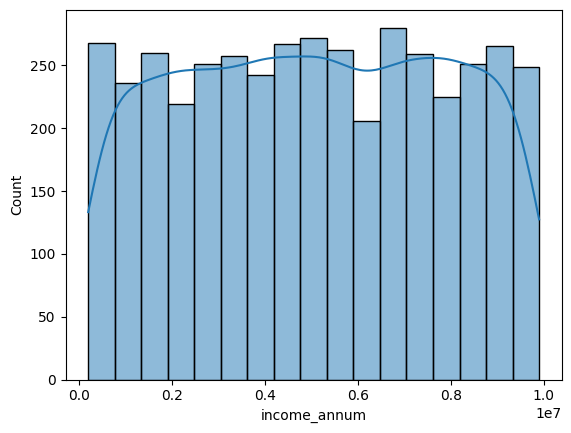

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['income_annum'], kde=True)  # kde=True adds a density plot
plt.show()


In [136]:
from scipy.stats import shapiro

stat, p_value = shapiro(data['income_annum'])
print(f'Statistic={stat}, p-value={p_value}')

if p_value > 0.05:
    print("Looks like a normal distribution")
else:
    print("Not a normal distribution")

Statistic=0.9564434735398394, p-value=6.163744099524268e-34
Not a normal distribution


In [137]:
data.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_ Not Graduate', 'self_employed_ Yes'],
      dtype='object')

In [138]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
['loan_amount', 'loan_term','cibil_score']

data[['income_annum']] = min_max_scaler.fit_transform(data[['income_annum']])


In [139]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,0.969072,29900000,12,778,2400000,17600000,22700000,8000000,1,0,0
1,0,0.402062,12200000,8,417,2700000,2200000,8800000,3300000,0,1,1
2,3,0.917526,29700000,20,506,7100000,4500000,33300000,12800000,0,0,0
3,3,0.824742,30700000,8,467,18200000,3300000,23300000,7900000,0,0,0
4,5,0.989691,24200000,20,382,12400000,8200000,29400000,5000000,0,1,1


In [140]:
data[['commercial_assets_value','luxury_assets_value']]

,commercial_assets_value,luxury_assets_value
0,17600000,22700000
1,2200000,8800000
2,4500000,33300000
3,3300000,23300000
4,8200000,29400000
...,...,...
4264,500000,3300000
4265,2900000,11000000
4266,12400000,18100000
4267,700000,14100000


In [141]:
cols_to_scale = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value', 
    'luxury_assets_value', 'bank_asset_value'
]

# Initializing the scaler
scaler = MinMaxScaler()

# Fitting and transforming the relevant columns
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [142]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1,0,0
1,0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0,1,1
2,3,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0,0,0
3,3,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0,0,0
4,5,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0,1,1


In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = data.drop('loan_status', axis=1)
y = data['loan_status']

model = LogisticRegression(max_iter = 10000)
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92740047 0.92505855 0.92740047 0.91100703 0.92271663 0.89929742
 0.91334895 0.91803279 0.90632319 0.90610329]
Mean Accuracy: 0.9156688766478653


In [144]:
print(y.value_counts())

loan_status
1    2656
0    1613
Name: count, dtype: int64


In [145]:
print(X.shape)
print(y.shape)

(4269, 11)
(4269,)


In [150]:
# Train the model on the entire dataset
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [151]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9121779859484778
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       318
           1       0.93      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.91       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
 [[278  40]
 [ 35 501]]


In [157]:
param_grid = [
    # Solvers supporting L1, L2, ElasticNet
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.2, 0.5, 0.8],  # Only relevant when 'penalty' is 'elasticnet'
        'max_iter': [100, 200, 500]
    },
    # Solvers supporting only L2
    {
        'solver': ['lbfgs', 'newton-cg'],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500]
    },
    # Solvers supporting L1 and L2
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500]
    }
]


In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X, y)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)



Fitting 10 folds for each of 195 candidates, totalling 1950 fits
Best Parameters: {'C': 0.1, 'l1_ratio': 0.2, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.9187144726281185


c:\Users\rokka\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [165]:
model

LogisticRegression()

In [166]:
import joblib

# Assuming your trained model is in a variable called 'model'
joblib.dump(model, 'model.pkl')


['model.pkl']

In [167]:
pip install Flask

  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\rokka\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
